<a href="https://colab.research.google.com/github/ranjanmitra/AWS-Learn/blob/main/Cardio_Fitness_Project_solution_jpnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

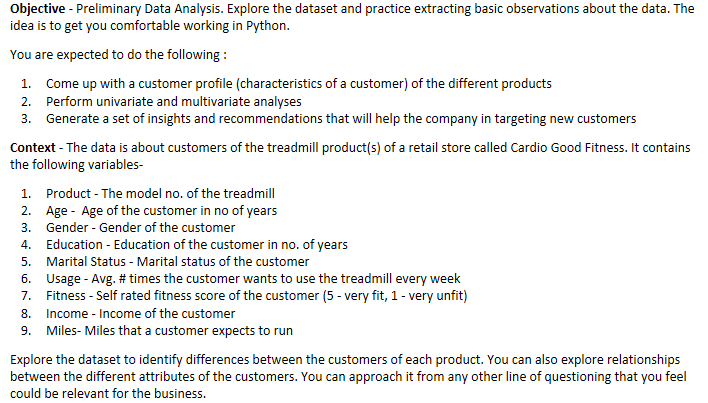


![image.png](
  
)

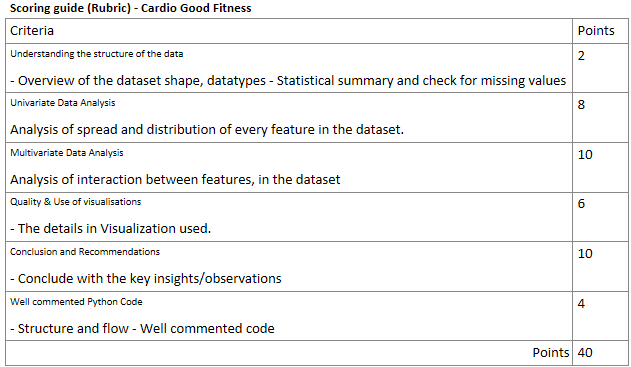

In [ ]:
import sys
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
import json
# tells python to actually display the graphs

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
cgf = pd.read_csv('/content/drive/My Drive/UT-Austin-AIML/Project/CardioGoodFitness.csv')

Mounted at /content/drive


In [ ]:
##  Overview of dataset
#  Shape ,datatypes,Summary and NULL values
len(cgf.columns)   ## There are 9 columns 
len(cgf)  ## There are 180 rows  


180

In [ ]:
cgf.isnull().sum()  ## Provides 0 NULLLvalues for all columns and rows of data.SO NO missing values 

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
# Datatypes of columns in the data set
cgf.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
cgf=cgf['Age']

### Univariate Analysis - AGE
Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis.


(array([17., 37., 44., 22., 18., 17., 13.,  3.,  4.,  5.]),
 array([18. , 21.2, 24.4, 27.6, 30.8, 34. , 37.2, 40.4, 43.6, 46.8, 50. ]),
 <a list of 10 Patch objects>)

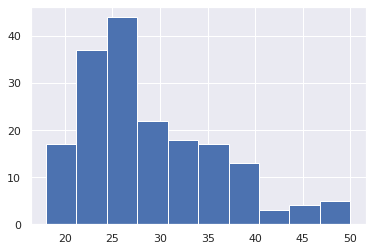

In [ ]:
# The following code plots a histrogram using the matplotlib package.
# The bins argument creates class intervals. In this case we are creating 50 such intervals
plt.hist(cgf, bins=10)

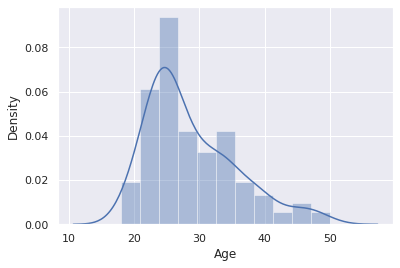

In [ ]:
# plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.
sns.distplot(cgf) 

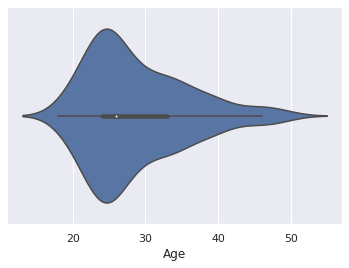

In [ ]:
# The bins argument creates class intervals. In this case we are creating 50 such intervals
sns.violinplot(cgf)

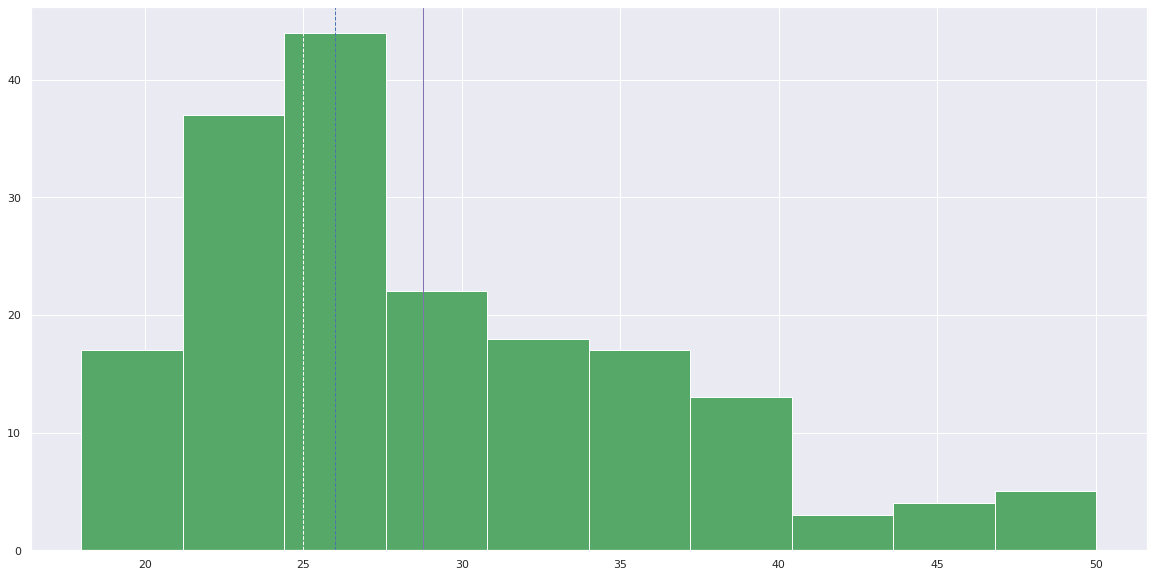

In [ ]:
#closer look at the distribution by plotting a simple histogram with 10 bins.
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(cgf, color='g') # plots a simple histogram
plt.axvline(cgf.mean(), color='m', linewidth=1)
plt.axvline(cgf.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(cgf.mode()[0], color='w', linestyle='dashed', linewidth=1)

* The mean and median in the distribution mathches with the mean calculated below 
* The most number customers between age 24.5 and 27.5

*   Theere very few customer from Age 40 +
*  Between Age 40 - 50 there is an increase in frequency of usage 




In [ ]:
mean1=cgf.mean(axis=0)
print("Mean Age: " ,  mean1)
Median1=cgf.median(axis=0)
print("Median Age : " ,  Median1)
Mode1=cgf.mode()
print("Mode Age : " ,Mode1)

Mean Age:  28.788888888888888
Median Age :  26.0
Mode Age :  0    25
dtype: int64


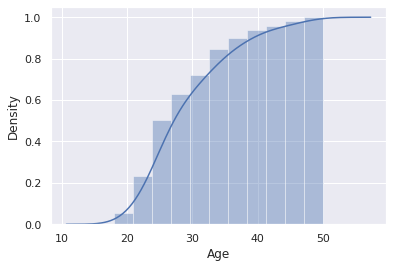

In [ ]:
sns.distplot(cgf, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

## **Multivariate analysis**

Multivariate analysis is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2
ex: Pairplot, 3D scatter plot

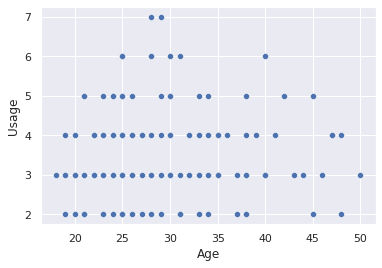

In [ ]:
cgf_mv = pd.read_csv('/content/drive/My Drive/UT-Austin-AIML/Project/CardioGoodFitness.csv')
sns.scatterplot(cgf_mv['Age'], cgf_mv['Usage'])  # Plots the scatter plot using two variables

In [ ]:
cgf_mv.shape
cgf_mv.dtypes.value_counts


<bound method IndexOpsMixin.value_counts of Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object>

In [ ]:
 cgf_mv.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


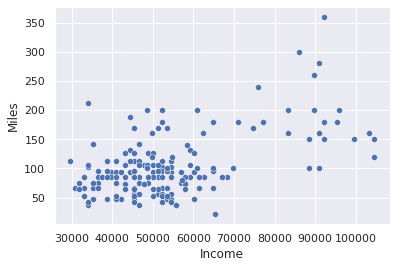

In [ ]:
sns.scatterplot(cgf_mv['Income'], cgf_mv['Miles'])  # Plots the scatter plot using Income and Miles 

In [ ]:
#descriptive stats of continuous columns
cgf_mv[['Age','Education','Usage','Fitness','Income','Miles']].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


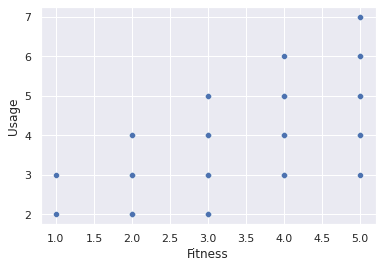

In [ ]:
sns.scatterplot(cgf_mv['Fitness'], cgf_mv['Usage'])  # Plots the scatter plot using Fitness and Usage

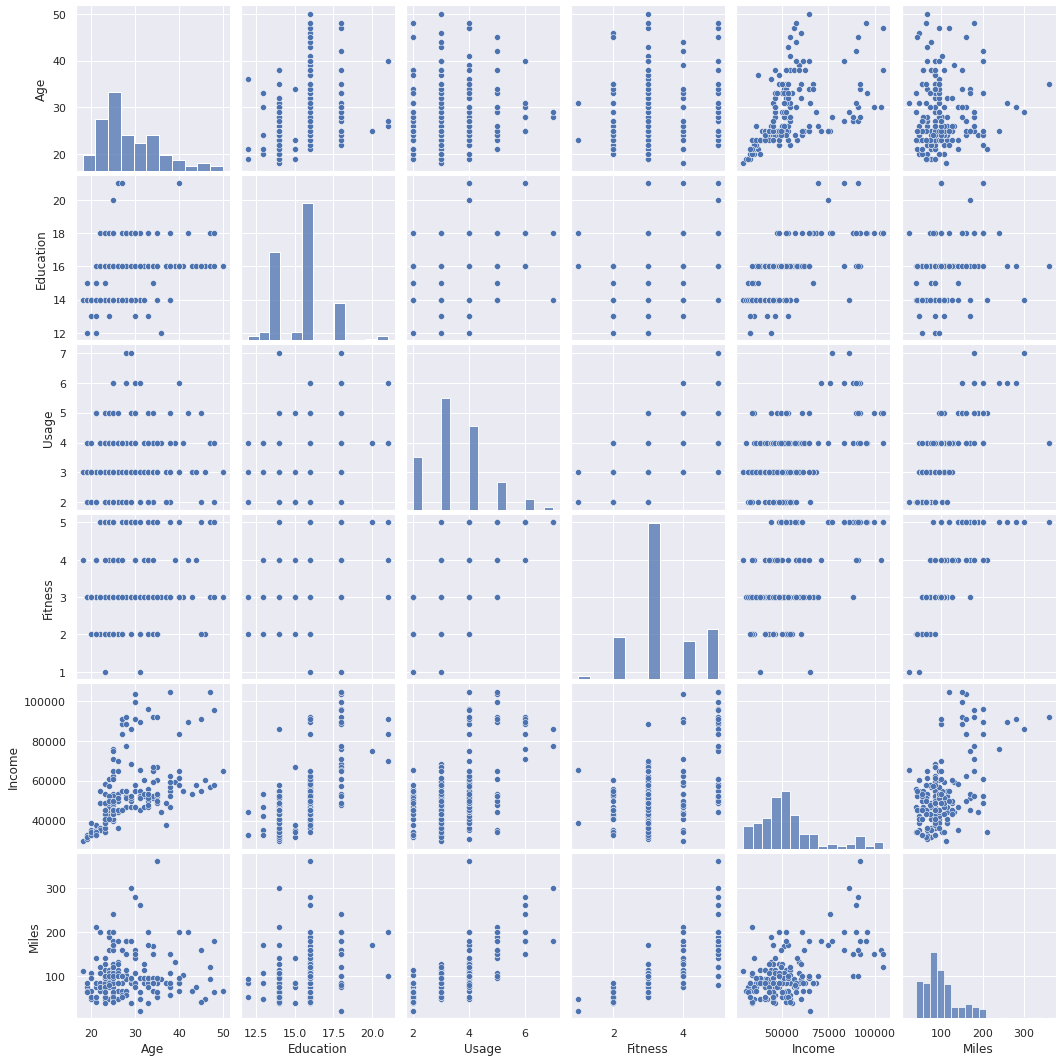

In [ ]:
sns.pairplot(cgf_mv)    # Provided the Multivariate scatter plots across all variables

In [ ]:
cgf_mv.corr()   # displays the correlation between every possible pair of attributes as a dataframe

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


## Numerical vs Categorical

- Usage versus Gender




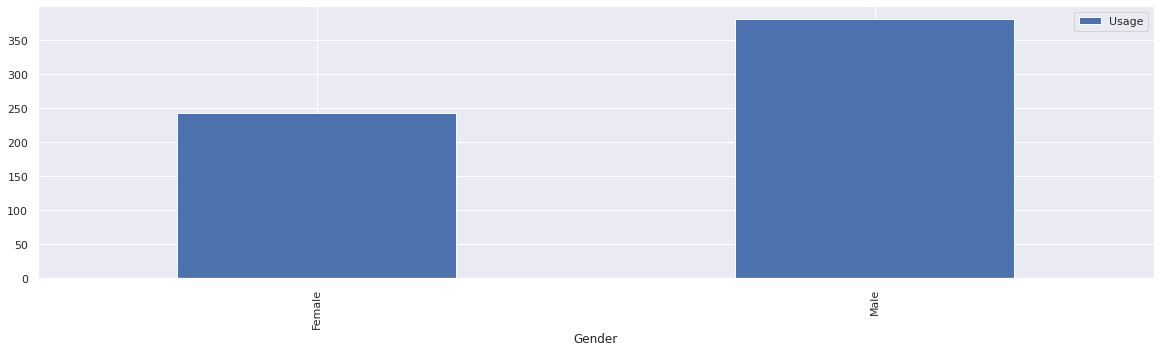

In [ ]:
cgf_mv.groupby(by=['Gender'])['Usage'].sum().reset_index().sort_values(['Usage']).tail(10).plot(x='Gender',
                                                                                                           y='Usage',
                                                                                                           kind='bar',
                                                                                                           figsize=(20,5))
plt.show()



*   MaritalStatus  versus Fitness

*   Gender  versus Fitness




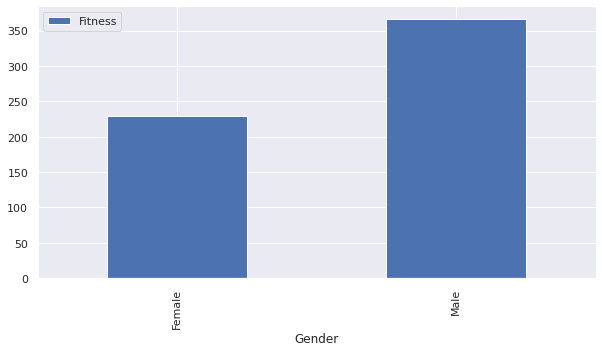

In [ ]:
cgf_mv.groupby(by=['Gender'])['Fitness'].sum().reset_index().sort_values(['Fitness']).head(50).plot(x='Gender',
                                                                                                           y='Fitness',
                                                                                                           kind='bar',
                                                                                                           figsize=(10,5))
plt.show()

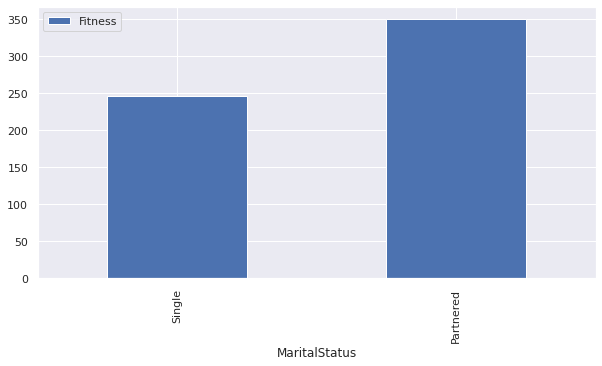

In [ ]:
cgf_mv.groupby(by=['MaritalStatus'])['Fitness'].sum().reset_index().sort_values(['Fitness'],ascending=True).head(50).plot(x='MaritalStatus',
                                                                                                           y='Fitness',
                                                                                                           kind='bar',
                                                                                                           figsize=(10,5))
plt.show()


*   Product versus Usage 




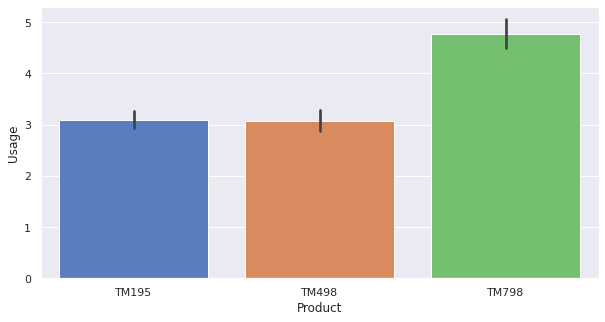

In [ ]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='Product', y='Usage', data=cgf_mv, palette='muted')  # barplot

### Numerical vs. Numerical



*   Usage v/s Income




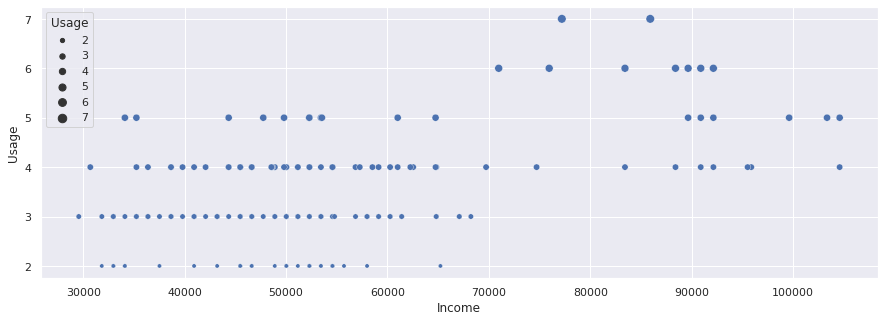

In [ ]:
 
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=cgf_mv['Income'],y='Usage', data=cgf_mv, size = "Usage") # scatter plot

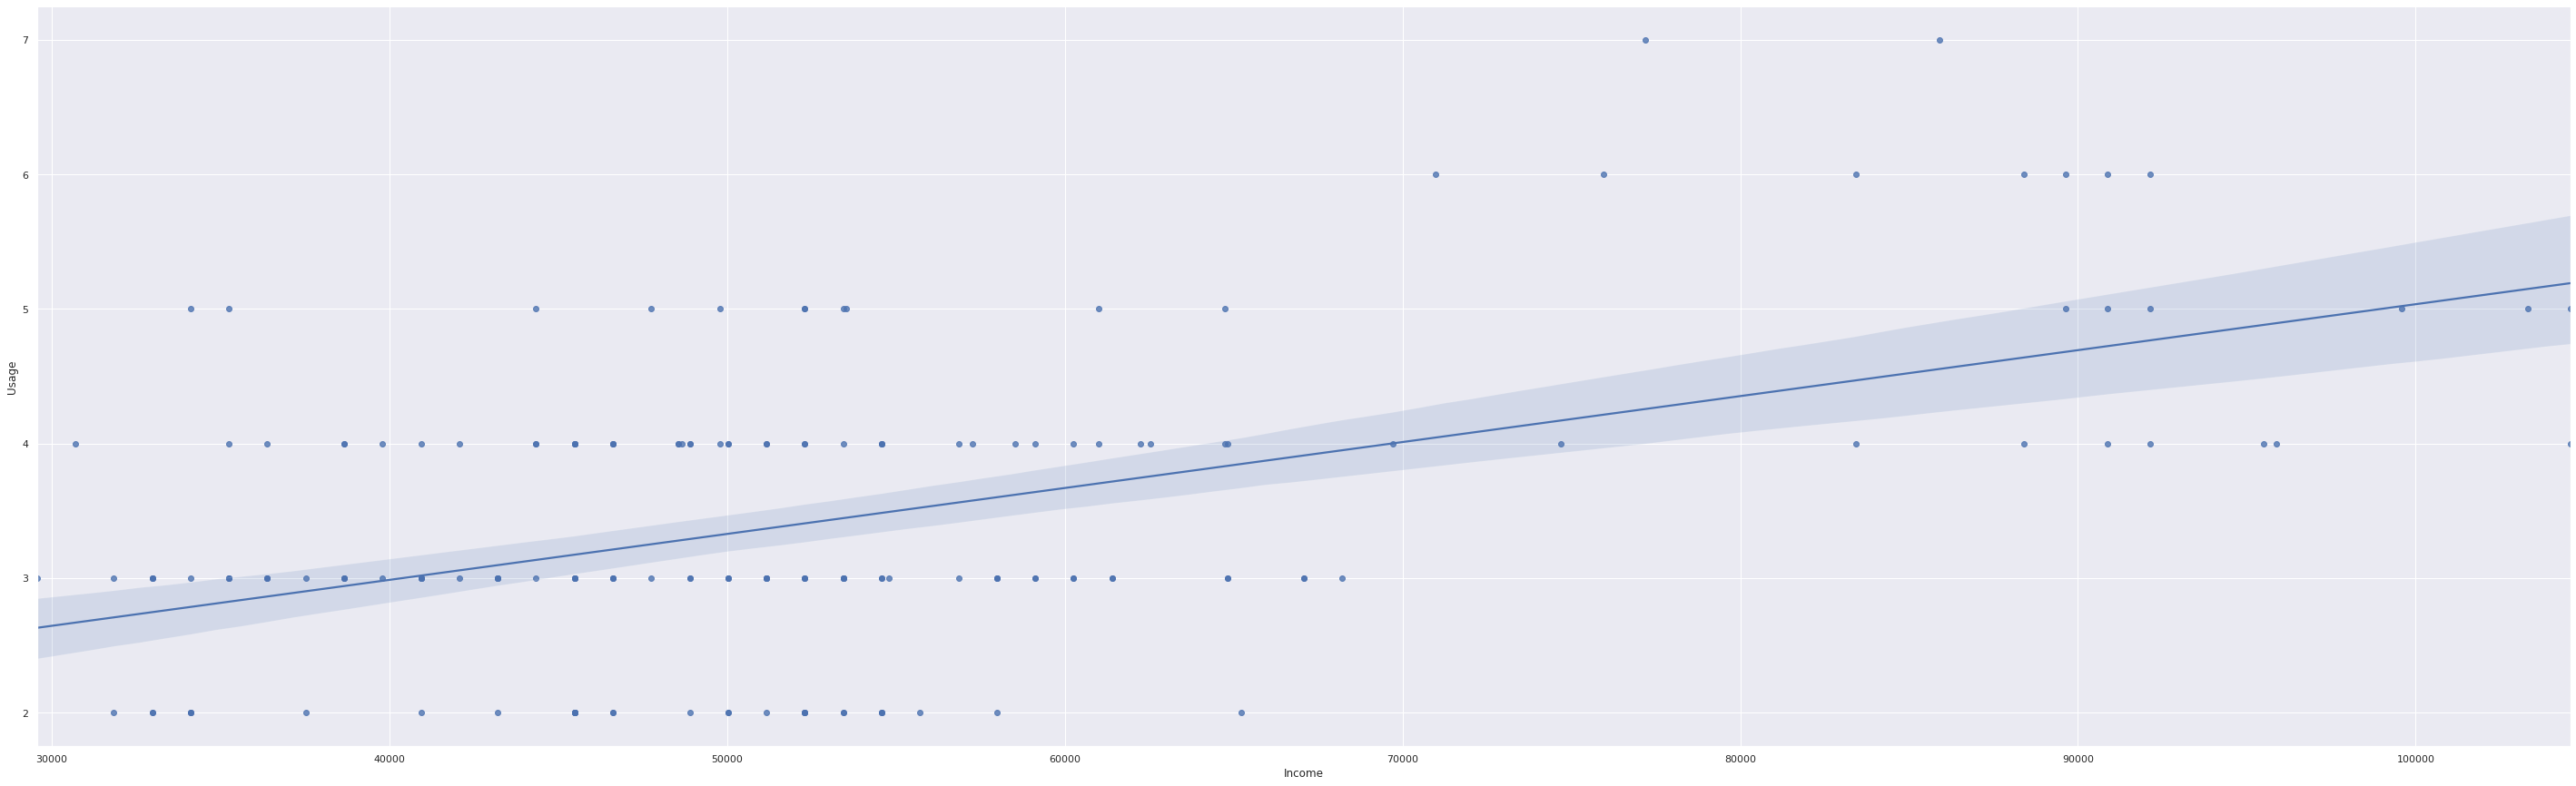

In [ ]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='Income',y='Usage', data=cgf_mv ) # regression plot - scatter plot with a regression line

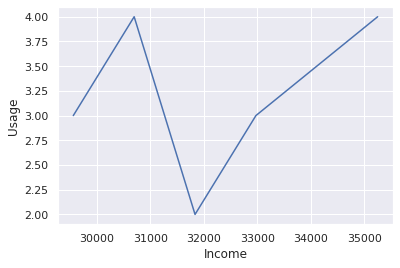

In [ ]:
sns.lineplot(x='Income',y='Usage', data=cgf_mv.head() )

## Correlation among pairs of continuous variables

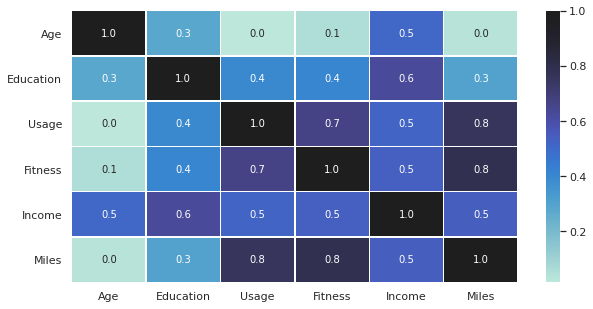

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(cgf_mv.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

### Multivariate Analysis - Multiple Qualitative and Quantitative

In [ ]:
 cgf_mv.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


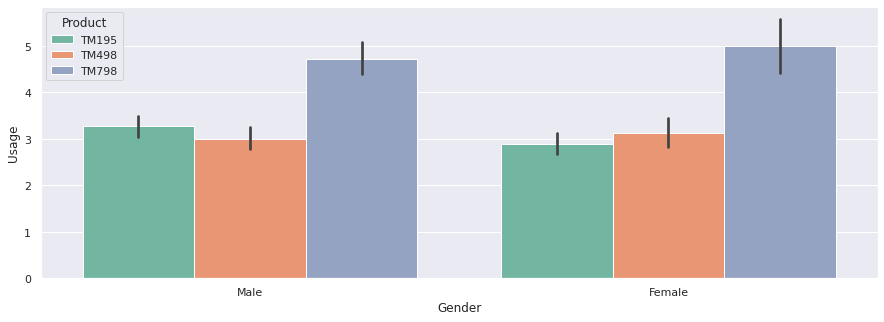

In [ ]:
## Usage counts by Gender and Product
plt.figure(figsize=(15,5))
sns.barplot(data=cgf_mv,x='Gender',y='Usage',hue='Product',palette='Set2')
plt.show()

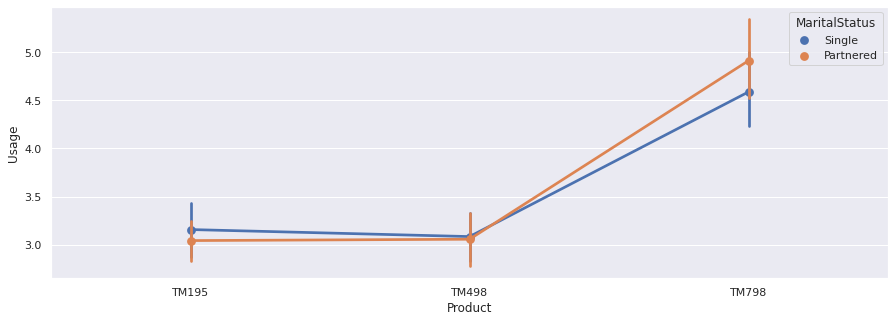

In [ ]:
# Usage counts by MAritalStatus and Product
plt.figure(figsize=(15,5))
sns.pointplot(x="Product", y="Usage", hue = 'MaritalStatus',  data=cgf_mv)
plt.show()

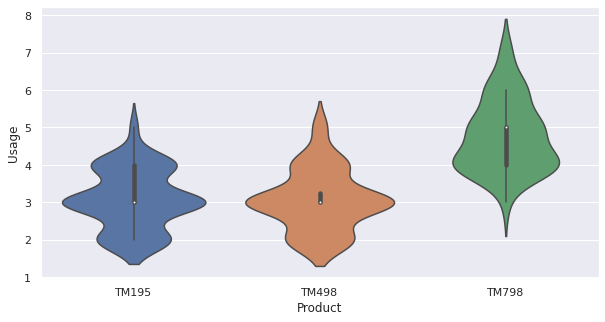

In [ ]:
# VIOLINPLOT Distribution of Usage across Product 
plt.figure(figsize=(10,5))
sns.violinplot(x=cgf_mv.Product, y=cgf_mv['Usage'])
plt.show()

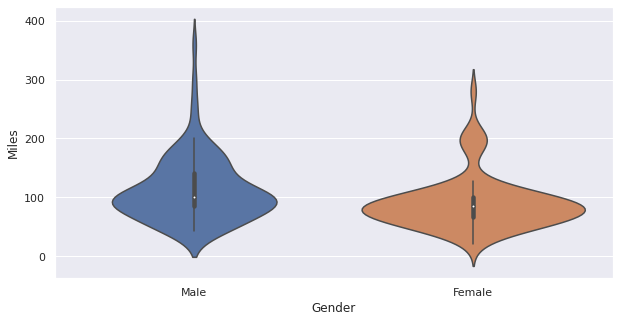

In [ ]:
# VIOLINPLOT  Distribution of Miles across Gender 
plt.figure(figsize=(10,5))
sns.violinplot(x=cgf_mv.Gender, y=cgf_mv['Miles'])
plt.show()

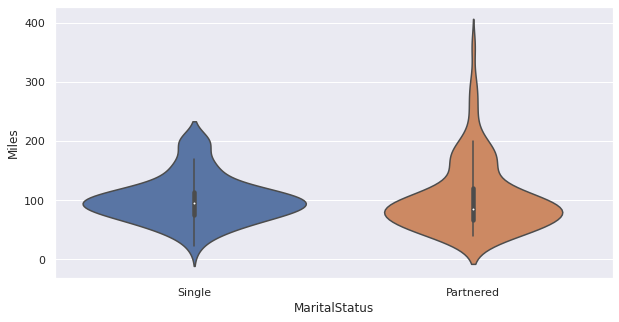

In [ ]:
# VIOLINPLOT Distribution of Miles across MaritalStatus 
plt.figure(figsize=(10,5))
sns.violinplot(x=cgf_mv.MaritalStatus, y=cgf_mv['Miles'])
plt.show()

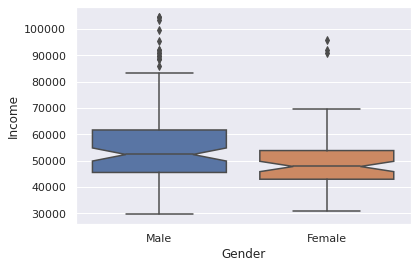

In [ ]:
# Boxplot distribution of Gender versus Income  
sns.boxplot(cgf_mv['Gender'], cgf_mv['Income'],notch=True);

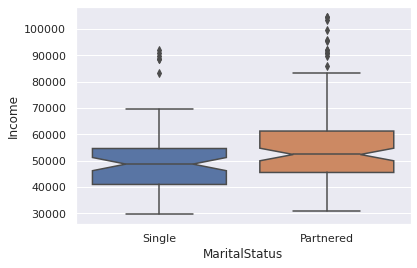

In [ ]:
# Boxplot distribution of MaritalStatus versus Income  
sns.boxplot(cgf_mv['MaritalStatus'], cgf_mv['Income'],notch=True);

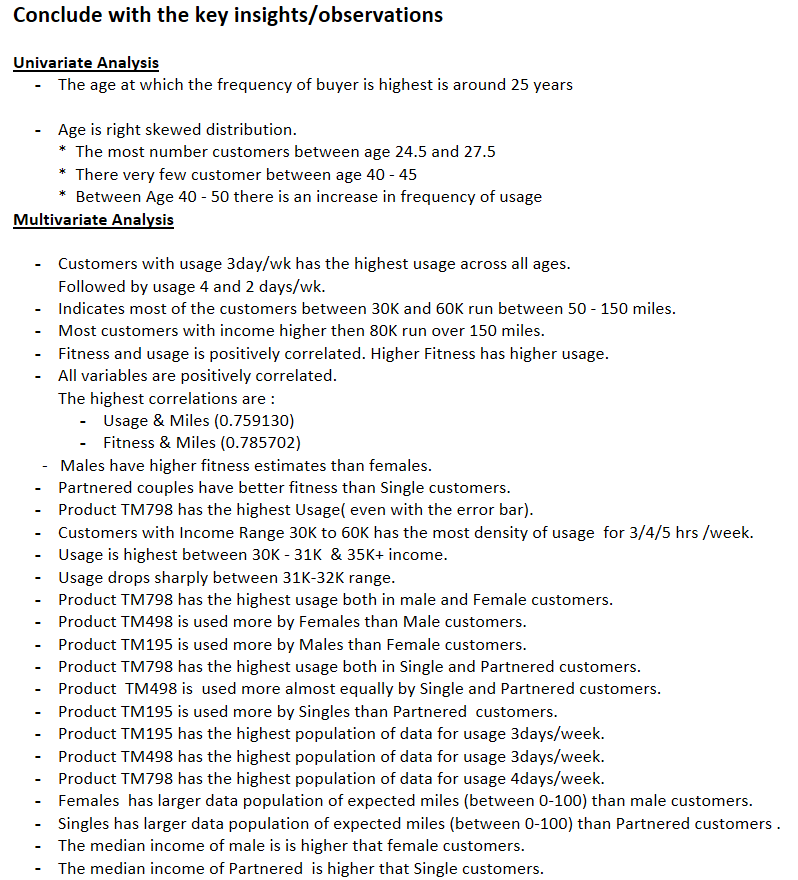